In [1]:
import cv2, os
import numpy as np

def normalise(img, background = [255,255,255]):
    # change background to black(0)
    # transorm the rest of the pixels to
    # monotone for easier comparison later

    black = 0
    white = 255
    k = 0
    l=0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if list(img[i][j]) == background:
                img[i][j] = black
                l+=1
            else:
                img[i][j] = white
                k+=1
    print (k,l)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

### Loading and normalising the image

In [2]:
one = "ss/faa-gov/0/screenshotnav-class-hNav.png"
two = "ss/faa-gov/1/screenshotnav-class-hNav.png" 

# img1 is the core image
# img2 will be broken down into components
# then the components will be checked against img1

img1 = cv2.imread (one)
img2 = cv2.imread (two)

# print ("Normalising Image 1:" end = "\t")
# img1 = normalise(img1)
# print ("Done")

print ("Normalising Image 2")
img2Mask = normalise(img2)


Normalising Image 2
1150879 3738721


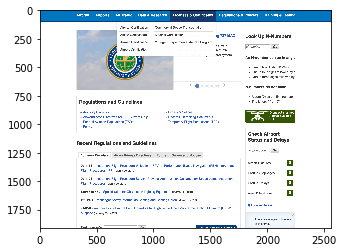

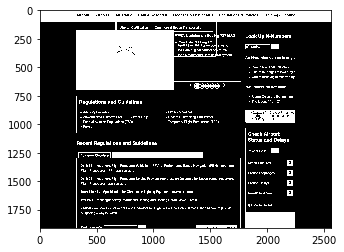

In [4]:
# cv2.imshow("Original",img2)
# cv2.imshow("Mask", img2Mask)

from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(cv2.imread (two), cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(img2Mask,cmap='gray')
plt.show()



### Connected components 

(1910, 2560)


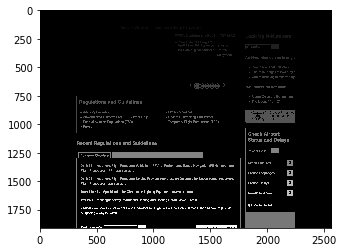

In [5]:
a, markers = cv2.connectedComponents(img2Mask.astype(np.uint8),connectivity=8)

plt.imshow(markers, interpolation='nearest',cmap='gray')

print (markers.shape)

714511
[      0       1       2 ... 1801437 1801438 1801439]


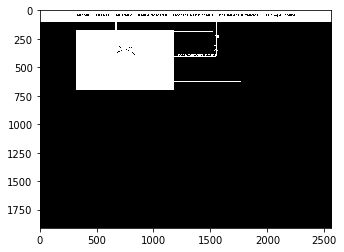

In [22]:
import skimage 

mask2 = skimage.measure.label(markers, background = 0).flatten() 

comp1 = np.where(mask2==1)[0]

print (len(comp1))

print (comp1)

sizeForFlatten = markers.shape[0]*markers.shape[1]

mask3 = np.zeros(sizeForFlatten)
for c in comp1: 
    mask3[c] = 1

mask3 = mask3.reshape(markers.shape[0],markers.shape[1])

plt.imshow(mask3, interpolation='nearest',cmap='gray')


In [28]:
originalBinary = normalise(cv2.imread("test.jpg"))

print (originalBinary.flatten)

4889600 0
<built-in method flatten of numpy.ndarray object at 0x12ec5a210>


[   0    1    2 ... 2557 2558 2559]
[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


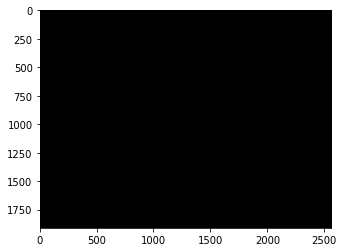

In [36]:
originalBinary_flatten = originalBinary.flatten()
originalBinary_map = np.where(originalBinary==255)[1]

sizeForFlatten = 1910*2560

originalBinary_mask = np.zeros(sizeForFlatten)

for pixel in originalBinary_map: 
    originalBinary_mask[pixel] = 1
    
originalBinary_mask = originalBinary_mask.reshape (1910,2560)

print (originalBinary_mask)

plt.imshow(originalBinary_mask, interpolation='nearest',cmap='gray')

In [38]:
print (originalBinary_map)
print (comp1)

# found = True 

# for pixel in comp1: 
#     if not pixel in originalBinary_map:
#         found = False
#         continue
        
# print (found)
    

0
0


In [35]:
ptr_i_range = len(comp1)-1
ptr_j_range = len(originalBinary_map)-1
ptr_i = 0
ptr_j = 0

match = True
exit = False

while exit==False:
    if comp1[ptr_i] == originalBinary_map[ptr_j]:  
        
        if ptr_i < ptr_i_range: 
            ptr_i +=1
        else:
            exit = True
        
        if ptr_j < ptr_j_range: 
            ptr_j +=1
        else:
            exit = True
            
    else: 
        if ptr_j < ptr_j_range: 
            ptr_j +=1
        else:
            exit = True

if ptr_i == ptr_i_range and ptr_j == ptr_j_range:
    match = True
    
print (match)
    

IndexError: index 0 is out of bounds for axis 0 with size 0